In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data =pd.read_csv(r"C:\Users\Lenovo\Downloads\Modified_SQL_Dataset.csv")

In [4]:
data.shape

(30919, 2)

In [5]:
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


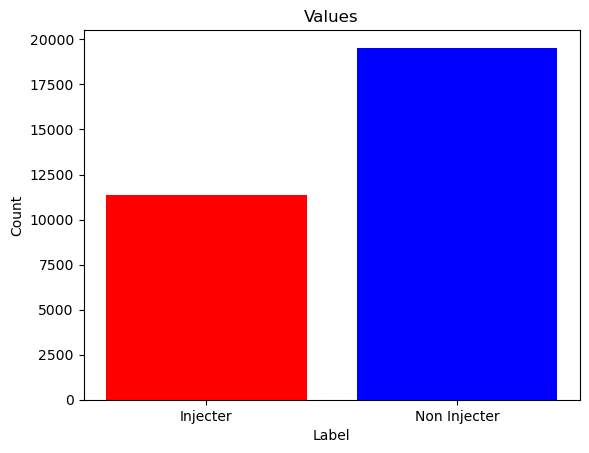

Injecter : 11382 | Non Injecter : 19537


In [7]:
count_NonInjection = len(data[data.Label==0])
count_Injection = len(data[data.Label==1])
labels=["Injecter","Non Injecter"]
counts = [count_Injection,count_NonInjection]
plt.bar(labels, counts, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Values')
plt.show()
print(f"Injecter : {count_Injection} | Non Injecter : {count_NonInjection}")

In [8]:
count_null = data.isna().sum().sum()
count_not_null = data.notna().sum().sum()

Text(0.5, 1.0, 'Total Null and Not Null Values')

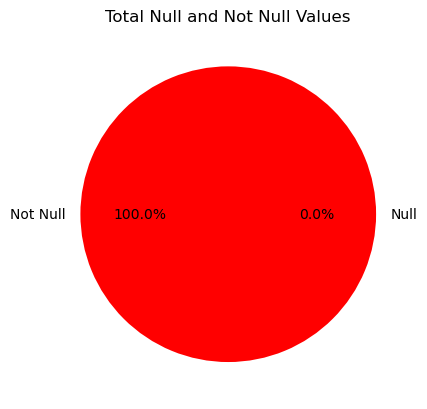

In [9]:
count_null,count_not_null
plt.pie([count_null,count_not_null],labels=["Null","Not Null"],colors=["yellow","red"],autopct='%.1f%%')
plt.title('Total Null and Not Null Values')

In [10]:
print("missing values :")
print(data.isna().sum())

missing values :
Query    0
Label    0
dtype: int64


In [11]:
data.duplicated().sum()

166

In [12]:
data = data.drop_duplicates()


In [13]:
data.duplicated().sum()

0

In [14]:
x= data["Query"].values
y= data["Label"].values

In [17]:
data["Query"] = data["Query"].apply(stemming)
x=data["Query"].values

In [18]:
data.head(30)

,Query,Label
0,pg sleep time,1
1,creat user name identifi pass temporari tables...,1
2,utl inaddr get host address select distinct ta...,1
3,select user id union select version,1
4,select user id union select version,1
5,select name syscolumn id select id sysobject n...,1
6,select user id,1
7,load file char,1
8,select user id union select version,1
9,select user id union select version,1


In [19]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
X = vectorizer.transform(x)

In [20]:
print(X)

  (0, 12729)	0.7016096523130692
  (0, 11858)	0.42275469093866885
  (0, 9782)	0.5736047132568602
  (1, 13338)	0.2802413773077381
  (1, 12565)	0.31869717487731547
  (1, 12561)	0.28579266705711764
  (1, 12415)	0.6373943497546309
  (1, 9598)	0.25641587584615294
  (1, 8587)	0.16068900443241801
  (1, 6004)	0.30655310006750514
  (1, 3117)	0.30655310006750514
  (1, 2798)	0.22897207618769466
  (2, 13363)	0.2089900002241891
  (2, 12412)	0.5557911550885695
  (2, 12372)	0.1964768121182034
  (2, 11534)	0.10217488880257795
  (2, 11110)	0.23337963147298108
  (2, 8587)	0.3575867577861793
  (2, 7340)	0.3392271365358245
  (2, 6124)	0.20941453418226097
  (2, 5812)	0.2089900002241891
  (2, 5036)	0.20284381672988552
  (2, 3338)	0.36037153588767434
  (2, 109)	0.205967495136482
  (3, 13581)	0.58703050827996
  :	:
  (30745, 2373)	0.2681876813748105
  (30746, 13275)	0.29042657142127953
  (30746, 12922)	0.40951984358702814
  (30746, 12801)	0.3966339216011325
  (30746, 12033)	0.42703779905724715
  (30746, 11588)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=2)

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)
score_lr_train =accuracy_score(y_train,y_pred_lr_train)
score_lr_test =accuracy_score(y_test,y_pred_lr_test)

In [26]:
print(f"acuracy_score using logitstic regression training : {score_lr_train:.3f} test :{score_lr_test:.3f}")

acuracy_score using logitstic regression training : 0.932 test :0.927


In [27]:
cm_lr=confusion_matrix(y_test,y_pred_lr_test) 

In [28]:
print("Logistic Regression")
print(cm_lr)

Logistic Regression
[[4826   18]
 [ 546 2299]]


In [29]:
avg_score_lr = cv_scores_lr.mean()
print("logistic regression:", avg_score_lr)

logistic regression: 0.9162036657401202


In [34]:
joblib.dump(lr, 'trained_model.pkl')

['trained_model.pkl']